In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data.csv')
df.head()

,id,item,keyword,latitude,longitude,ipv4
0,1,systemic,Books,24.413452,77.259864,220.45.42.113
1,2,orchestration,Shoes,17.405035,77.279956,118.94.105.221
2,3,focus group,Kids,32.557056,74.370400,26.85.240.66
3,4,user-facing,Sports,17.016354,88.929766,38.19.150.116
4,5,clear-thinking,Tools,22.034902,85.761362,225.219.30.199


In [85]:
lat, long, keywords = df['latitude'], df['longitude'], df['keyword']
kmeans = KMeans(n_clusters=6)
kmeans.fit(list(zip(lat, long)))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

[[15.65786035 93.3178451 ]
 [16.32180694 73.61753608]
 [23.86697863 84.24034315]
 [31.89753431 75.23717225]
 [12.69942336 82.68648305]
 [32.1032263  91.07651287]] [2 1 3 0 2 2 4 5 5 2 3 0 3 0 1 4 2 3 2 2 3 5 3 5 3 5 0 4 1 5 5 5 1 3 2 2 5
 3 4 4 1 0 5 4 5 5 3 2 5 2 1 3 0 3 0 4 1 3 0 3 2 4 3 5 4 4 3 0 3 3 0 0 5 4
 0 5 3 5 2 1 5 0 0 3 5 1 4 0 2 5 2 4 5 1 0 2 1 3 2 5 0 4 3 3 2 2 2 4 0 2 5
 2 1 3 4 3 5 0 4 2 5 3 1 1 1 1 1 5 3 0 5 1 2 4 4 0 0 5 3 3 3 5 1 2 5 4 1 5
 2 4 1 3 4 4 0 1 5 0 0 0 5 2 2 4 2 5 5 5 2 2 1 5 4 4 3 1 4 2 5 4 5 2 1 0 5
 0 4 3 3 5 2 3 5 3 0 1 1 3 5 0 1 0 5 5 5 2 0 1 0 1 1 2 5 2 3 3 5 5 0 5 0 4
 4 3 4 3 3 3 3 3 4 4 3 0 4 1 2 4 4 5 5 5 0 5 4 1 2 1 2 3 2 5 0 3 3 5 1 3 0
 5 5 3 2 1 3 0 1 1 5 2 2 1 5 3 1 5 3 5 1 4 4 1 5 1 0 4 0 4 1 0 1 3 5 5 1 5
 3 4 1 5 1 3 4 3 5 3 2 3 0 2 4 4 4 2 0 0 5 0 4 3 1 0 3 5 5 4 2 3 1 2 5 5 0
 1 1 4 3 5 4 4 2 2 3 1 5 5 3 2 5 3 0 3 4 1 1 2 2 1 4 0 4 1 1 3 0 3 2 2 2 5
 4 4 1 2 0 3 0 5 5 2 1 5 3 2 3 3 5 4 5 2 2 0 5 0 3 4 4 3 1 2 4 3 5 5 1 2 3
 3 3 1 4 3 4

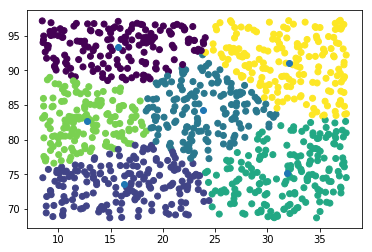

In [86]:
centers = np.array(kmeans.cluster_centers_)
labels = kmeans.labels_
plt.scatter(lat, long, c=labels)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
print(centers, labels)

In [87]:
def center_based_list(centers, df, column):
    dick = {}
    for idx, cen in enumerate(labels):
        location = {}
        location['lat'] = lat[idx]
        location['log'] = long[idx]
        location['keywords'] = keywords[idx]
        if cen in dick:
            dick[cen].append(location)
        else:
            dick[cen] = []
            dick[cen].append(location)            
    
    location_stats = {}
    keyword_stats = {}
    for label in dick:
        cluster_list = dick[label]
        cluster_stats = {}
        for item in cluster_list:
            words = item['keywords'].split(',')
            for word in words:
                if word not in cluster_stats:
                    cluster_stats[word] = 1
                else:
                    cluster_stats[word] += 1
                
                if word not in keyword_stats:
                    keyword_stats[word] = 1
                else:
                    keyword_stats[word] += 1
        
            location_stats[label] = cluster_stats
        
    return location_stats, keyword_stats
    
d1,d2 = center_based_list(centers, df, 'keyword')

In [88]:
for _ in d1:
    print(d1[_], '\n')
    
print("--------------------")
print(d2)

{'Books': 10, 'Tools': 7, 'Grocery': 9, 'Health': 10, 'Industrial': 6, 'Garden': 7, 'Shoes': 9, 'Electronics': 7, 'Baby': 7, 'Games': 8, 'Outdoors': 9, 'Home': 8, 'Toys': 8, 'Automotive': 4, 'Movies': 4, 'Sports': 10, 'Kids': 5, 'Music': 8, 'Beauty': 4, 'Jewelery': 9, 'Computers': 3, 'Clothing': 2} 

{'Shoes': 15, 'Outdoors': 8, 'Automotive': 17, 'Games': 9, 'Garden': 10, 'Industrial': 6, 'Clothing': 12, 'Electronics': 6, 'Computers': 4, 'Tools': 6, 'Grocery': 7, 'Sports': 12, 'Toys': 4, 'Health': 6, 'Home': 7, 'Kids': 5, 'Movies': 7, 'Beauty': 9, 'Jewelery': 12, 'Baby': 7, 'Music': 4, 'Books': 7} 

{'Kids': 9, 'Movies': 4, 'Garden': 15, 'Outdoors': 6, 'Health': 8, 'Sports': 10, 'Clothing': 11, 'Grocery': 9, 'Toys': 5, 'Books': 14, 'Computers': 5, 'Tools': 9, 'Baby': 7, 'Shoes': 9, 'Music': 8, 'Jewelery': 12, 'Electronics': 11, 'Beauty': 5, 'Industrial': 9, 'Home': 5, 'Games': 8, 'Automotive': 4} 

{'Sports': 9, 'Kids': 9, 'Music': 9, 'Electronics': 8, 'Garden': 7, 'Baby': 3, 'Beauty':

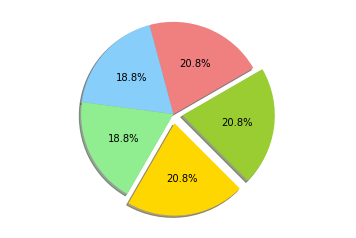

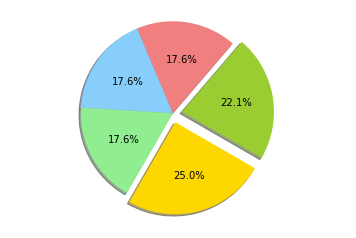

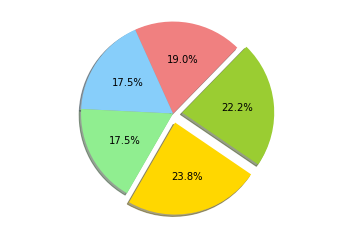

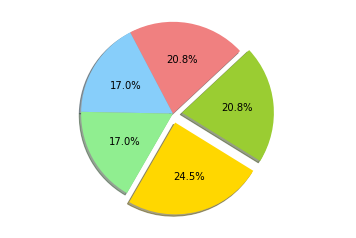

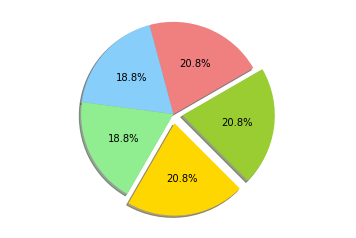

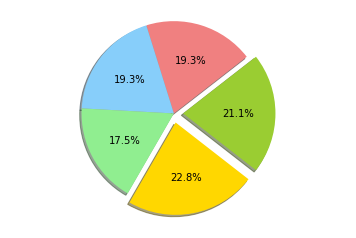

In [89]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen',]
explode = (0.1,)*2 + (0.0,) * 3   # explode 1st slice
 
for _ in d1:
    sizes = []
    location_stats = d1[_]
    for key in location_stats:
        sizes.append(location_stats[key])
        

    sizes.sort(reverse=True)    
    sizes = sizes[:5]
    plt.pie(sizes, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=240)

    plt.axis('equal')
    plt.show()